<a href="https://colab.research.google.com/github/Hotchapu13/Fantasy-Premier-League/blob/main/FPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis**
This notebook oulines the use of jupyter notebooks to carry out exploratory data analysis on various datasets from the Fantasy Premier League

## **Dataset Overview**


In [3]:
import pandas as pd
import numpy as np

## **Data Loading**
- source: https://github.com/vaastav/Fantasy-Premier-League
- Description: A FPL library that gets all the basic stats for each player, gw-specific data for each player and season history of each player


In [4]:
# Historical datasets
raw_urls = [
    "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2021-22/gws/merged_gw.csv",
    "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2022-23/gws/merged_gw.csv",
    "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2023-24/gws/merged_gw.csv"
]

# Current Season dataset
current_raw_url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2024-25/gws/merged_gw.csv"
current_df = pd.read_csv(current_raw_url, on_bad_lines='skip')

# columns = [name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW]
dfs = []

# Loading and concatenating the three datasets
for url in raw_urls:
  df = pd.read_csv(url)
  season = url.split("/")[9]
  df["Season"] = season
  dfs.append(df)

historical_df = pd.concat(dfs, ignore_index=True)

historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81677 entries, 0 to 81676
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        81677 non-null  object 
 1   position                    81677 non-null  object 
 2   team                        81677 non-null  object 
 3   xP                          81677 non-null  float64
 4   assists                     81677 non-null  int64  
 5   bonus                       81677 non-null  int64  
 6   bps                         81677 non-null  int64  
 7   clean_sheets                81677 non-null  int64  
 8   creativity                  81677 non-null  float64
 9   element                     81677 non-null  int64  
 10  fixture                     81677 non-null  int64  
 11  goals_conceded              81677 non-null  int64  
 12  goals_scored                81677 non-null  int64  
 13  ict_index                   816

## **Data Cleaning**
Removing null values from the dataset

In [5]:
print(historical_df.isna().sum())

name                              0
position                          0
team                              0
xP                                0
assists                           0
bonus                             0
bps                               0
clean_sheets                      0
creativity                        0
element                           0
fixture                           0
goals_conceded                    0
goals_scored                      0
ict_index                         0
influence                         0
kickoff_time                      0
minutes                           0
opponent_team                     0
own_goals                         0
penalties_missed                  0
penalties_saved                   0
red_cards                         0
round                             0
saves                             0
selected                          0
team_a_score                      0
team_h_score                      0
threat                      

In [6]:
historical_data = historical_df.dropna()

In [7]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56230 entries, 25447 to 81676
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        56230 non-null  object 
 1   position                    56230 non-null  object 
 2   team                        56230 non-null  object 
 3   xP                          56230 non-null  float64
 4   assists                     56230 non-null  int64  
 5   bonus                       56230 non-null  int64  
 6   bps                         56230 non-null  int64  
 7   clean_sheets                56230 non-null  int64  
 8   creativity                  56230 non-null  float64
 9   element                     56230 non-null  int64  
 10  fixture                     56230 non-null  int64  
 11  goals_conceded              56230 non-null  int64  
 12  goals_scored                56230 non-null  int64  
 13  ict_index                   5623

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

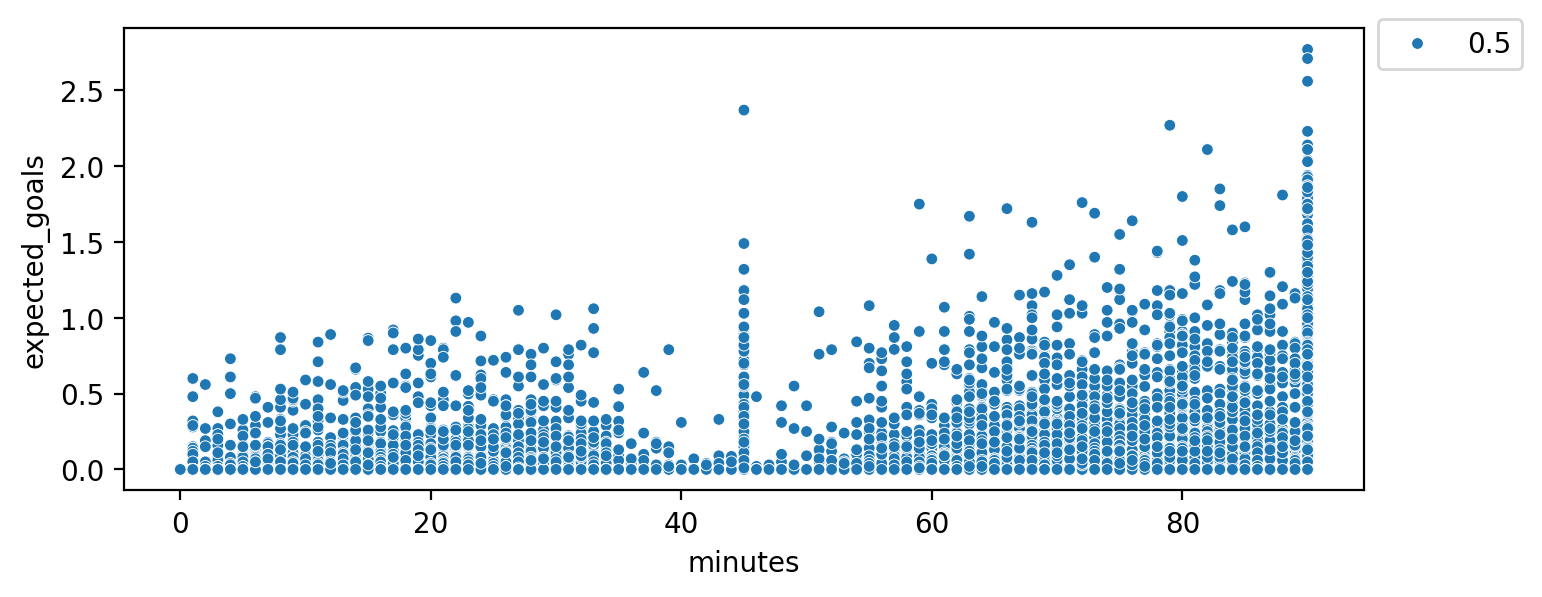

In [18]:
plt.figure(figsize=(8,3),dpi=200)
sns.scatterplot(data=historical_data,x='minutes',y='expected_goals',size=0.5)
plt.legend(bbox_to_anchor=(1,1.05))